In [20]:
import pandas as pd
import altair as alt
import os
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [9]:
data_dict = {}

for data in os.listdir("data"):
    name = data.split(".")[0]
    df = pd.read_csv('data/' + data)
    data_dict[name] = df


In [10]:
total_activity_time = alt.Chart(data_dict["enrollments"]).mark_bar().encode(
    x=alt.X("total_activity_time").bin(maxbins=20),
    y='count()'
)

total_activity_time
 

alt.Chart(...)

### Importing & processing navigation df

In [11]:
navigation = data_dict["navigation_events"]
navigation = navigation.dropna(axis=1, how='all')
navigation['event_time'] = pd.to_datetime(navigation['event_time'], errors='coerce')
navigation

/var/folders/st/m8tx8cq17pzccky_vq84z0yh0000gn/T/ipykernel_59614/811711063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  navigation['event_time'] = pd.to_datetime(navigation['event_time'], errors='coerce')


,id,type,action,event_time,session_id,object_id,membership_role,actor_id,event__object_type,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_http_method,event__attachment_type
0,a3bd94baaa440f4793ad08bb64ed3a8f,NavigationEvent,navigatedto,2033-03-27 03:08:48.947000+00:00,f8eac5633f79de90a77b33338b14dd8e,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,pdf
1,0f137ee4ff1b603e3c9de17c5dc9a1d2,NavigationEvent,navigatedto,2033-03-30 16:23:40.909000+00:00,90d33cac1281c636931efa7646e1e1c3,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,pdf
2,86109c5350e06d3d7fe0ec880f37193e,NavigationEvent,navigatedto,2033-03-25 12:57:06.195000+00:00,2c3cdb1505e1c2dbf93d70b499668328,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,png
3,da5b96f601b39f14e2cc7de59bea35b9,NavigationEvent,navigatedto,2033-03-20 15:57:10.521000+00:00,bd87f5bcffda3d2f6de47cf02697f43b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,png
4,7959480d52ab4c94821c122e27a48cd3,NavigationEvent,navigatedto,2033-01-11 18:05:29.939000+00:00,d5c5f36d8bc0ebc001c374f9daec961b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62834,e8e75e7c59c54442e61f73ab9c8046fd,NavigationEvent,navigatedto,2033-01-09 05:58:56.060000+00:00,c6707410cd346c60ec7a601d6c74db86,ae93ee47299d919d196a3c558782b4f4,"[""Learner""]",LEARNER_47,Entity,attachment,image002.jpg,attachment,GET,jpg
62835,070aa75e5032f7623e7dce170c17b5db,NavigationEvent,navigatedto,2033-05-01 08:29:23.934000+00:00,33f425abcca19e71c0c63d44c5b784c8,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_12,Entity,attachment,image004.jpg,attachment,GET,jpg
62836,3f8130deeba303f5eda546a8a6a42dbf,NavigationEvent,navigatedto,2033-03-30 05:15:38.391000+00:00,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,jpg
62837,dc65d663590f1ce9bd07a73fc810798f,NavigationEvent,navigatedto,2033-03-30 05:20:49.120000+00:00,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,jpg


### Importing pages df

In [12]:
pages = data_dict["pages"]
pages

,title,page_url,id,published
0,0.1 Course overview,0-dot-1-course-overview,b1d898888f6c7b3835249eafba32fda8,True
1,0.10 UBC grading guidelines,0-dot-10-ubc-grading-guidelines,d4e9d4c9e20351932d918333d0ac5d5d,True
2,0.11 Academic misconduct,0-dot-11-academic-misconduct,319770f1c152eab3ecc23afe264b2f12,True
3,"0.12 Accessibility, equity & diversity, netiqu...",0-dot-12-accessibility-equity-and-diversity-ne...,9b956857f78a44a200aedbc13825b886,True
4,0.13 Learning analytics,0-dot-13-learning-analytics,2d1bb7da0411ccc855e29a7455ae20f7,True
...,...,...,...,...
87,[wikipage] Assignment 2 Group sign up,wikipage-assignment-2-group-sign-up,972196dd128aeb62a66f5c02b897e7dd,True
88,Wikipage Assignment 2 Group Sign Up (Optional),wikipage-assignment-2-group-sign-up-optional,9ee9a2cacefb8be58dde2a381617e0ad,True
89,[wikipage] Assignment 3 Group sign up (optional),wikipage-assignment-3-group-sign-up-optional,0790ff605875f7393f9fde5c50c3eae4,True
90,Your Instructor,your-instructor,47cc5ac28d341bcc8e175c649974a314,True


### Merging navigation and pages

In [13]:
navigation_pages = pd.merge(navigation, pages[['title', 'id']],  left_on='object_id', right_on='id', how='left')
navigation_pages

,id_x,type,action,event_time,session_id,object_id,membership_role,actor_id,event__object_type,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_http_method,event__attachment_type,title,id_y
0,a3bd94baaa440f4793ad08bb64ed3a8f,NavigationEvent,navigatedto,2033-03-27 03:08:48.947000+00:00,f8eac5633f79de90a77b33338b14dd8e,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,pdf,NaN,NaN
1,0f137ee4ff1b603e3c9de17c5dc9a1d2,NavigationEvent,navigatedto,2033-03-30 16:23:40.909000+00:00,90d33cac1281c636931efa7646e1e1c3,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,pdf,NaN,NaN
2,86109c5350e06d3d7fe0ec880f37193e,NavigationEvent,navigatedto,2033-03-25 12:57:06.195000+00:00,2c3cdb1505e1c2dbf93d70b499668328,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,png,NaN,NaN
3,da5b96f601b39f14e2cc7de59bea35b9,NavigationEvent,navigatedto,2033-03-20 15:57:10.521000+00:00,bd87f5bcffda3d2f6de47cf02697f43b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,png,NaN,NaN
4,7959480d52ab4c94821c122e27a48cd3,NavigationEvent,navigatedto,2033-01-11 18:05:29.939000+00:00,d5c5f36d8bc0ebc001c374f9daec961b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,png,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62834,e8e75e7c59c54442e61f73ab9c8046fd,NavigationEvent,navigatedto,2033-01-09 05:58:56.060000+00:00,c6707410cd346c60ec7a601d6c74db86,ae93ee47299d919d196a3c558782b4f4,"[""Learner""]",LEARNER_47,Entity,attachment,image002.jpg,attachment,GET,jpg,NaN,NaN
62835,070aa75e5032f7623e7dce170c17b5db,NavigationEvent,navigatedto,2033-05-01 08:29:23.934000+00:00,33f425abcca19e71c0c63d44c5b784c8,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_12,Entity,attachment,image004.jpg,attachment,GET,jpg,NaN,NaN
62836,3f8130deeba303f5eda546a8a6a42dbf,NavigationEvent,navigatedto,2033-03-30 05:15:38.391000+00:00,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,jpg,NaN,NaN
62837,dc65d663590f1ce9bd07a73fc810798f,NavigationEvent,navigatedto,2033-03-30 05:20:49.120000+00:00,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,jpg,NaN,NaN


## Network plots per Unit

### Method

In [79]:
def df_to_graph(df, weight_mult=1,edge_mult=1):
    df = df.dropna(subset="title")

    df = df.rename(columns={'title': 'source'})
    df = df.sort_values(['event_time', 'session_id'])
    #df['source'] = df['source'].apply(lambda x: " ".join(x.split()[:2]))
    df['destination'] = df['source'].shift(-1)
    df = df[df['session_id'] == df['session_id'].shift(-1)]
    
    df = df.iloc[:-1]
    df = df[df['source']!=df['destination']]
    
    df['time_spent'] = df['event_time'].shift(-1) - df['event_time']
    df = df[df['time_spent'] < pd.Timedelta('30 minutes')]

    mapping_df = pd.DataFrame(df["source"].value_counts())
    df["weight"] = df["source"].map(mapping_df["count"])

    df['source_dest'] = df['source'] + df['destination']
    mapping_df = pd.DataFrame(df['source_dest'].value_counts())
    df["edge_weight"] = df["source_dest"].map(mapping_df["count"])
    
    # Create a layout for the graph (e.g., spring layout)
    G = nx.from_pandas_edgelist(df, source='source', target='destination')
    layout = nx.spring_layout(G)
   
    node_sizes = []
    for node in G.nodes:
        node_sizes.append(weight_mult * df[df.source == node]['weight'].iloc[0])

    edge_sizes = []
    for edge in G.edges:
        if df[(df.source == edge[0]) & (df.destination == edge[1])]['edge_weight'].empty:
            edge_sizes.append(edge_mult * 1)
        else:
            edge_sizes.append(edge_mult * df[(df.source == edge[0]) & (df.destination == edge[1])]['edge_weight'].iloc[0])

    # Draw nodes with sizes based on node weights
    nx.draw_networkx_nodes(G, pos=layout, node_size=node_sizes)

    # Draw edges and labels if needed
    nx.draw_networkx_edges(G, pos=layout, width=edge_sizes)
    nx.draw_networkx_labels(G, pos=layout)

    return G
        

#### Run for every unit

/var/folders/st/m8tx8cq17pzccky_vq84z0yh0000gn/T/ipykernel_59614/1945933936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['unit'] = df1['title'].str[:1]


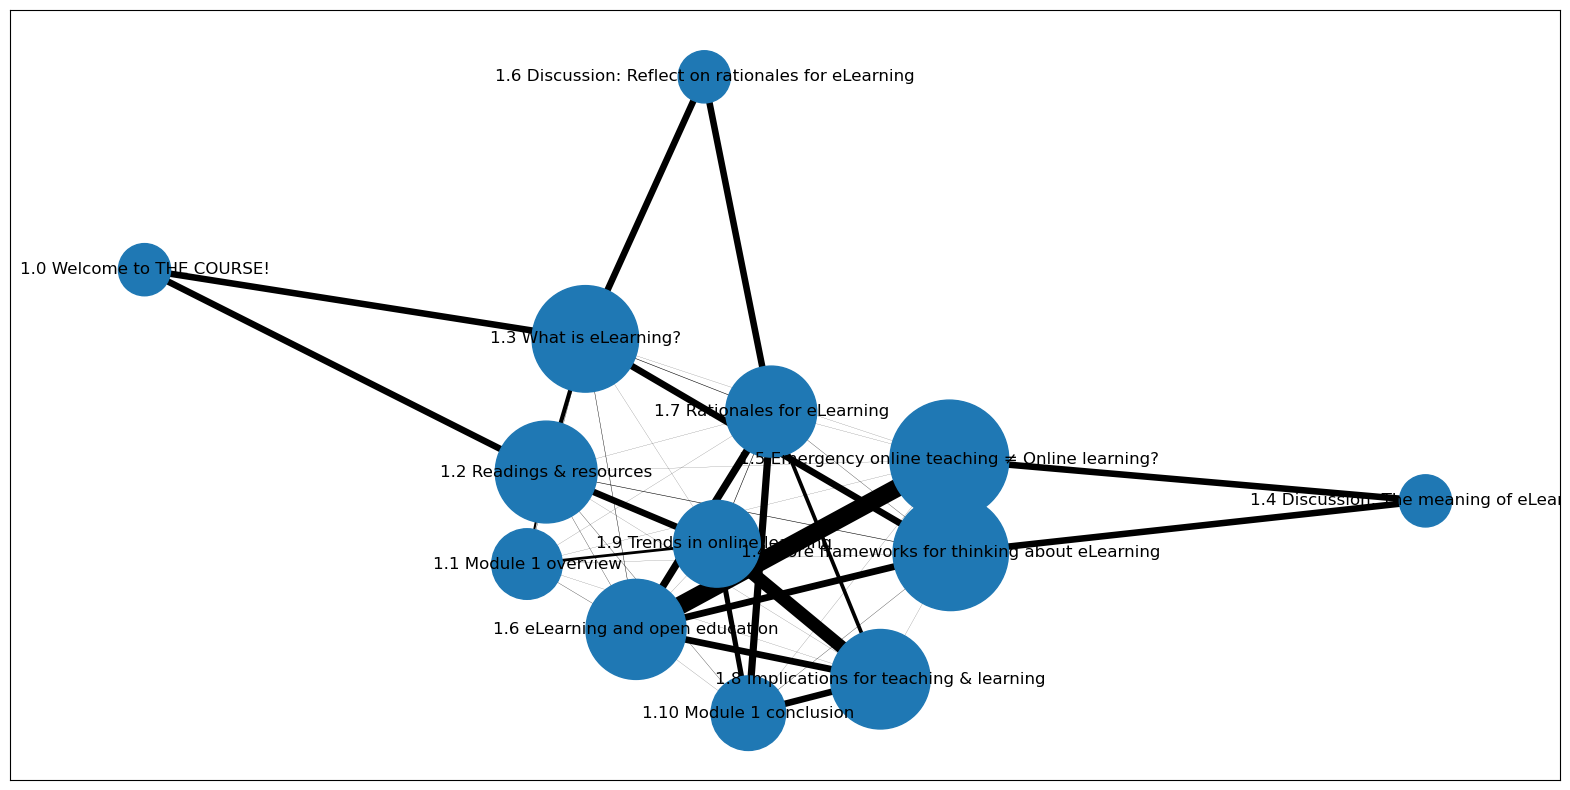

In [92]:
fig = plt.figure(figsize=(20, 10)) 

df1 = navigation_pages.dropna(subset="title")
df1['unit'] = df1['title'].str[:1]
df1 = df1[df1['unit'] == '1']
df_to_graph(df1, 30, 0.1)



### Graph for ALL LEARNERS and ALL PAGES

/var/folders/st/m8tx8cq17pzccky_vq84z0yh0000gn/T/ipykernel_59614/133044646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['unit'] = df1['title'].str[:1]


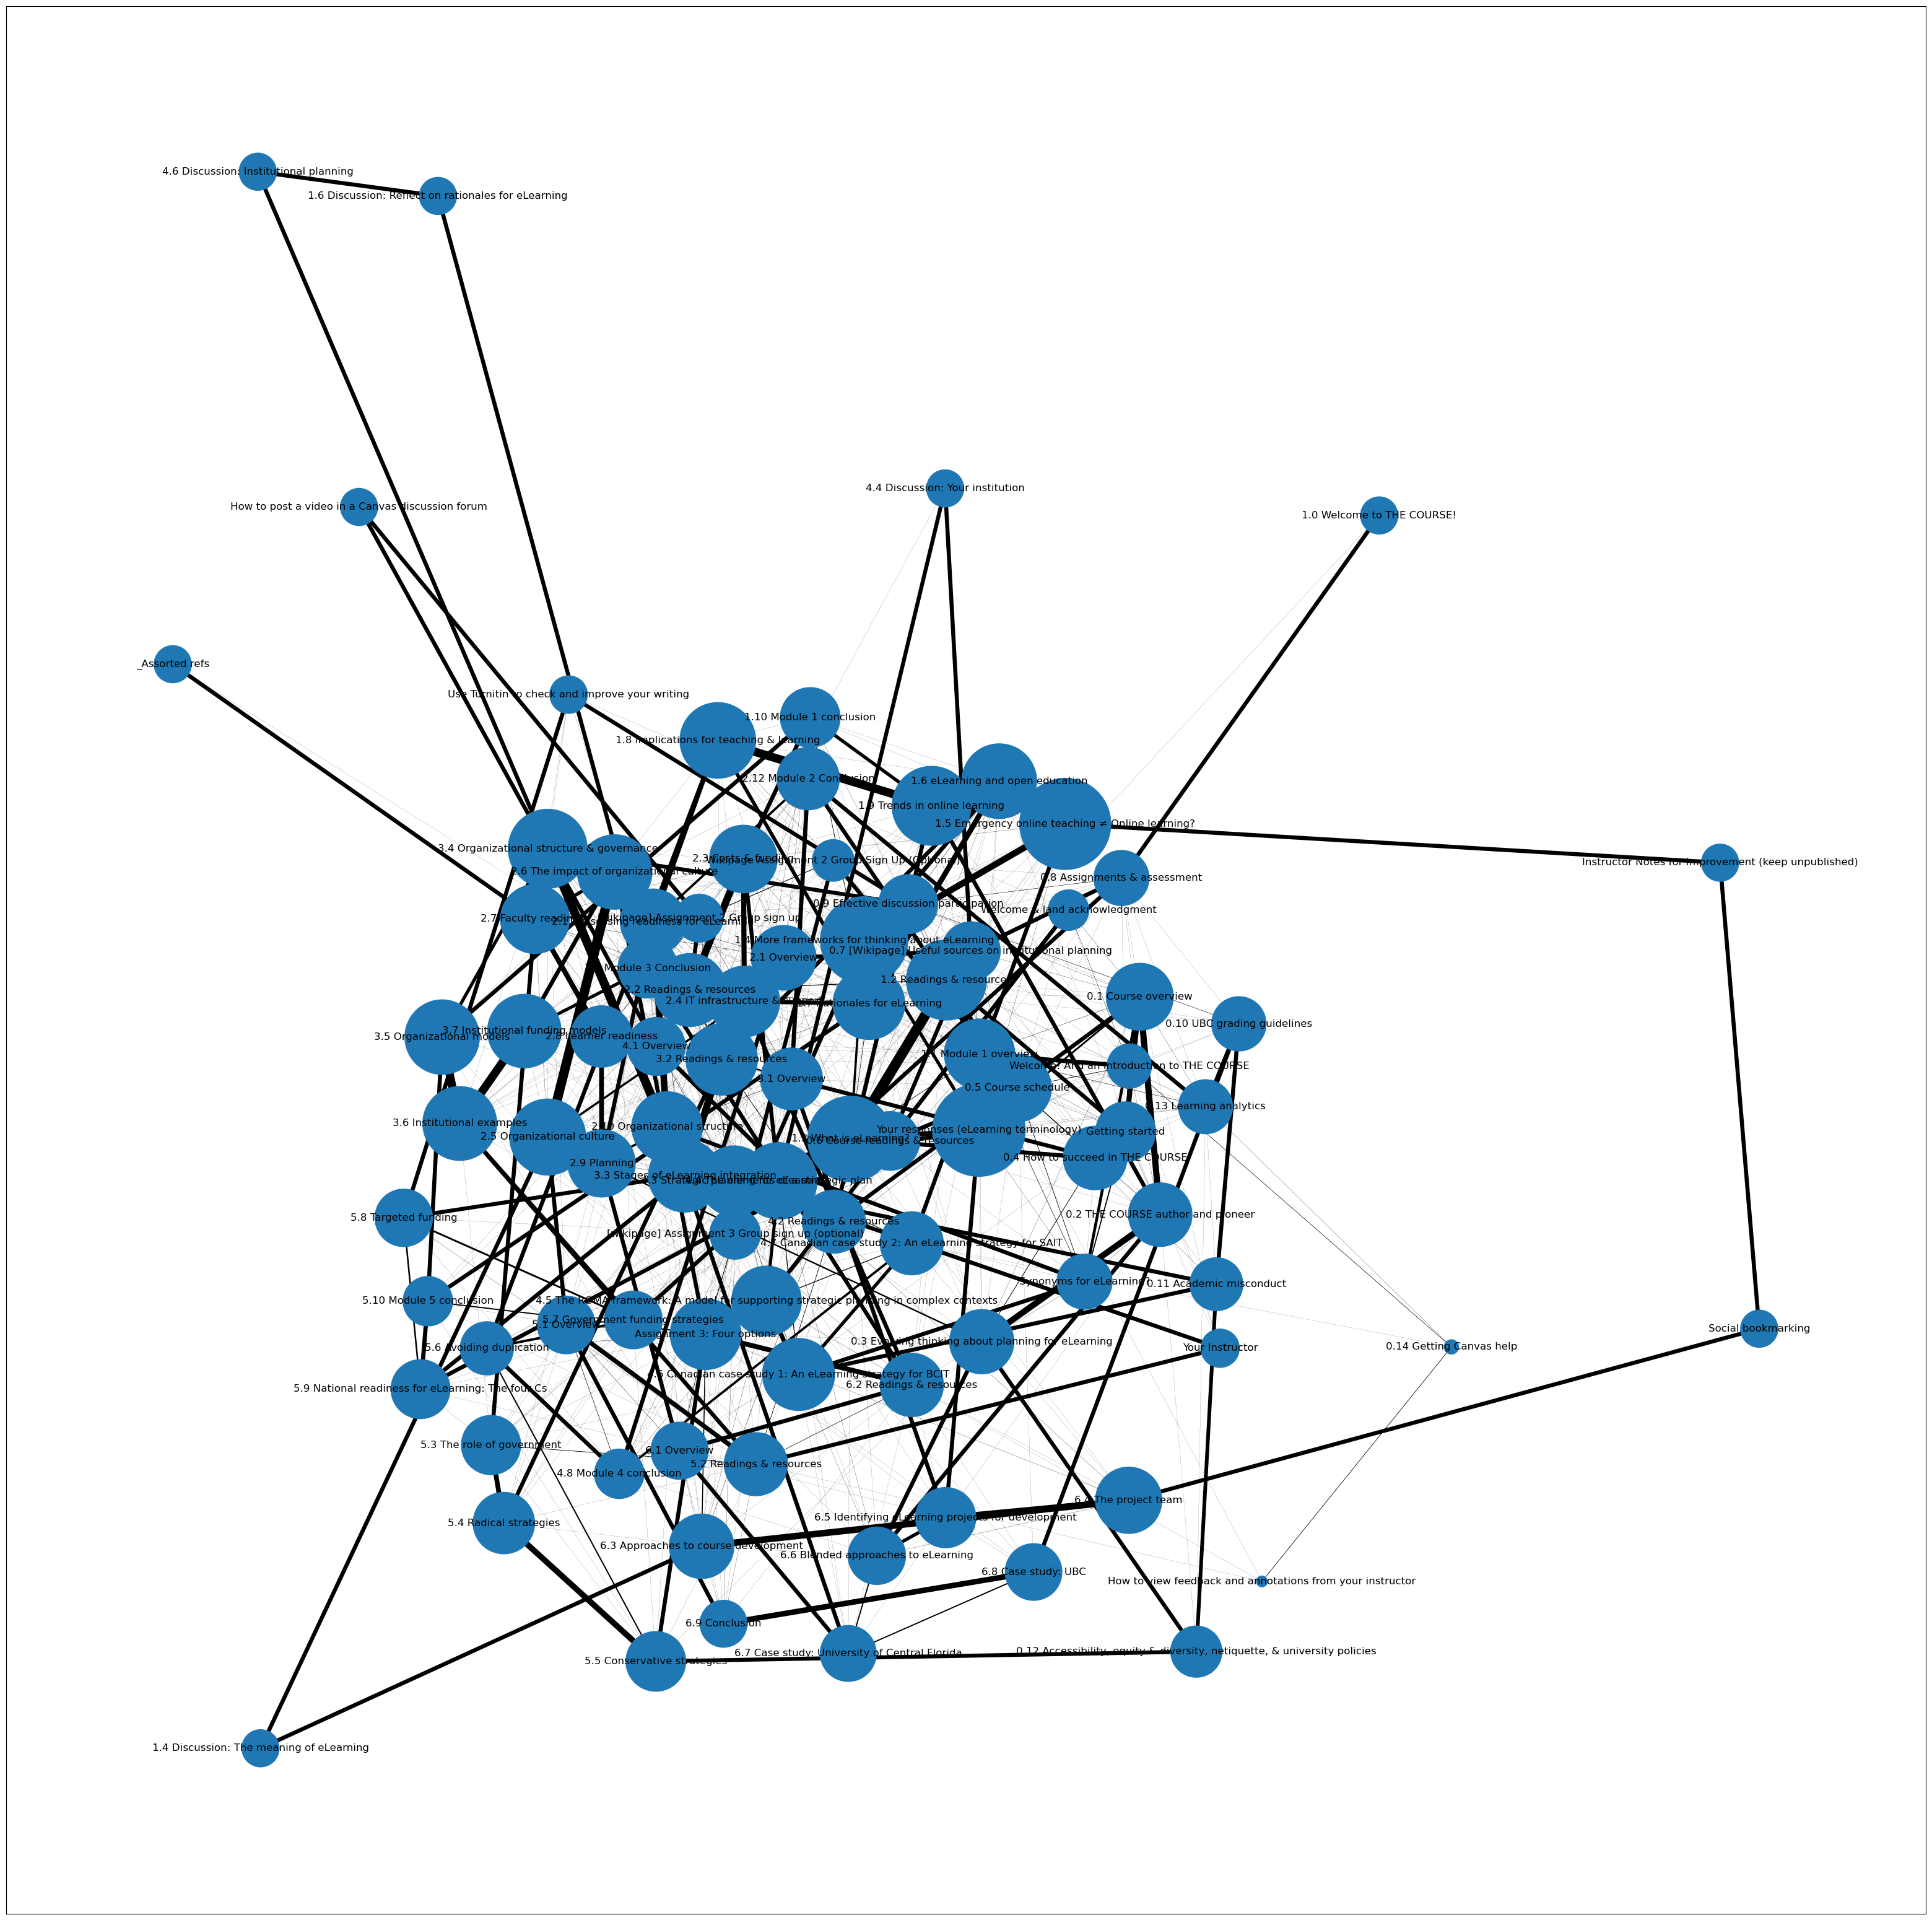

In [25]:
fig = plt.figure(figsize=(40, 40)) 

df1 = navigation_pages.dropna(subset="title")
df1['unit'] = df1['title'].str[:1]
#df1 = df1[df1['unit'] == '2']
df_to_graph(df1, 40, 0.1)

In [108]:
df = navigation_pages.copy()

df = df.dropna(subset="title")

df = df.rename(columns={'title': 'source'})
df = df.sort_values(['event_time', 'session_id'])
#df['source'] = df['source'].apply(lambda x: " ".join(x.split()[:2]))
df['destination'] = df['source'].shift(-1)
df = df[df['session_id'] == df['session_id'].shift(-1)]

df = df.iloc[:-1]
df = df[df['source']!=df['destination']]
df['time_spent'] = df['event_time'].shift(-1) - df['event_time']
#df['time_spent_min'] = df['time_spent'] < pd.Timedelta('30 minutes')
df = df[df['time_spent'] < pd.Timedelta('30 minutes')]
df['time_spent'] = df['time_spent'].dt.total_seconds()
df['unit'] = df['source'].str[:1]
df = df[df['unit'] == '5']


chart = alt.Chart(df).mark_bar().encode(
    
    x=alt.X('mean(time_spent):Q').title('Mean time spent (seconds)'),
    y=alt.Y('source').sort('-x').title('Webpage'),
    color=alt.value('#6495ED')
).properties(
    width=400,
    title="Time Spent"
).configure_legend(
    title=None,  # Remove the title
    labelFontSize=0  # Set the label font size to 0 (removes the labels)
)
chart

alt.Chart(...)